<a href="https://colab.research.google.com/github/webabdullah/DS_SESSION/blob/main/CASE2_UAS_Genap_Unsupervised_Learning_KMeans_and_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("column_2C_weka.csv")

In [35]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,label,label_hc
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1,1


In [15]:
a = data.degree_spondylolisthesis.max()
data[data.degree_spondylolisthesis == a] = np.mean(data.degree_spondylolisthesis)

In [16]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

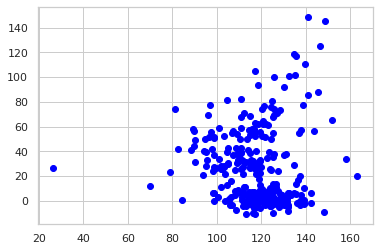

In [21]:
plt.scatter(x = data["pelvic_radius"],y = data["degree_spondylolisthesis"],color = "blue")
x = data["pelvic_radius"]
y = data["degree_spondylolisthesis"]

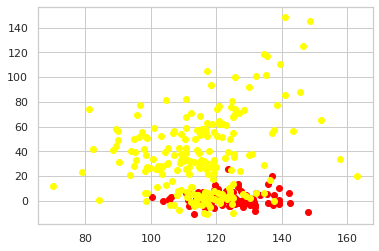

In [22]:
plt.scatter(x = data[data["class"] == "Normal"].pelvic_radius , y = data[data["class"] == "Normal"].degree_spondylolisthesis,color = "red")
plt.scatter(x = data[data["class"] == "Abnormal"].pelvic_radius , y = data[data["class"] == "Abnormal"].degree_spondylolisthesis,color = "yellow")

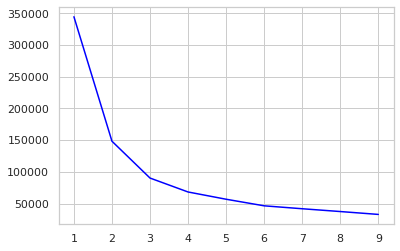

In [23]:
cluster_data_arg = {"x":x,"y":y}
cluster_data = pd.DataFrame(cluster_data_arg)
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color="blue")
plt.show()

In [24]:
kmeans2 = KMeans(n_clusters = 2)
clusters = kmeans2.fit_predict(cluster_data)
data["label"] = clusters

In [25]:
data_ac = pd.read_csv("column_2C_weka.csv")
data_ac["class"] = [0 if each == "Abnormal" else 1 for each in data_ac["class"]]
data_ac_class = data_ac["class"]
predict_class = data["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(data_ac_class - predict_class)*100))

accuracy is : 62.25806451612903


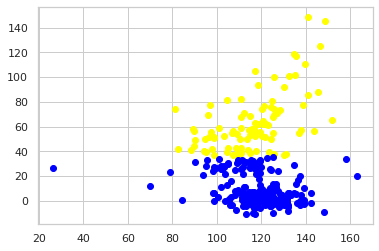

In [26]:
plt.scatter(x = data[data.label == 0].pelvic_radius,y = data[data.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label == 1].pelvic_radius,y = data[data.label == 1].degree_spondylolisthesis , color = "blue")

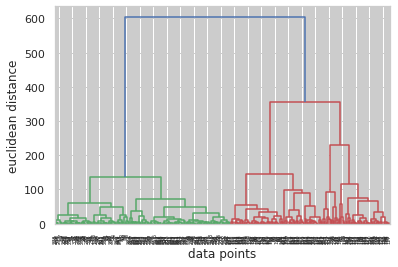

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(cluster_data)

data["label_hc"] = cluster

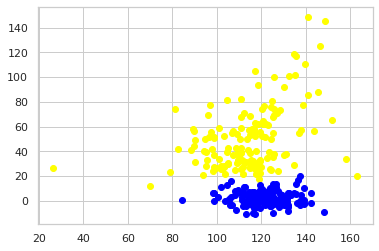

In [32]:
plt.scatter(x = data[data.label_hc == 0].pelvic_radius,y = data[data.label_hc == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label_hc == 1].pelvic_radius,y = data[data.label_hc == 1].degree_spondylolisthesis , color = "blue")

In [33]:
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100)))
hc_accuracy = int(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100))

accuracy is : 78.38709677419355
